# Stroke Prediction

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Importing Libraries** <a id="1"></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Importing Dataset** <a id="2"></a>

In [4]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [5]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**There are null values present in 'bmi'.**

In [7]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
dataset.bmi.replace(to_replace=np.nan, value=dataset.bmi.mean(), inplace=True)

**We replaced null values of 'bmi' with mean in that column.**

In [9]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**After checking, as you can see there are no null values present in our column.**

In [10]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
dataset.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


# **Data Visualization** <a id="3"></a>

## **Heat Map Correlation** <a id="3.1"></a>

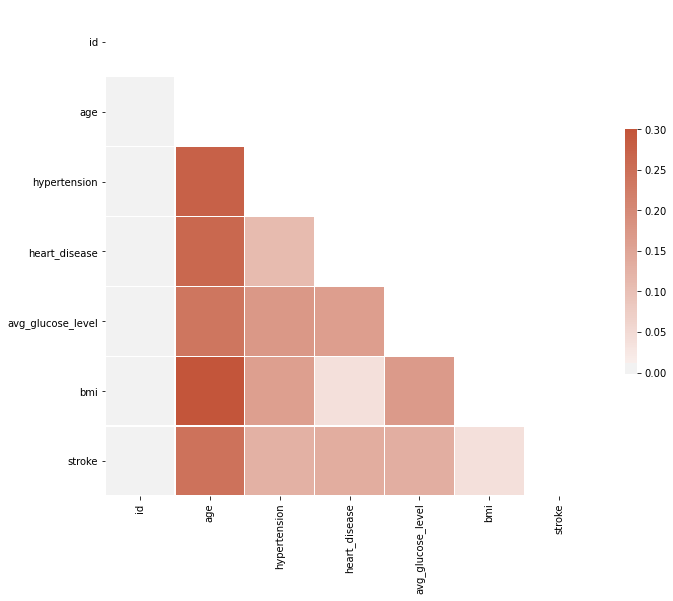

In [12]:
# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## **Count Plot** <a id="3.2"></a>

### **Gender** <a id="3.2.1"></a>

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


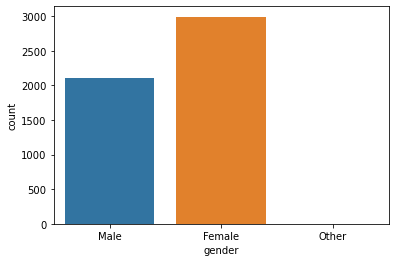

In [13]:
print(dataset.gender.value_counts())
# sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="gender")
plt.show()

*Above, you can see the Females present in our dataset is higher than males.*

### **Hypertension** <a id="3.2.2"></a>

0    4612
1     498
Name: hypertension, dtype: int64


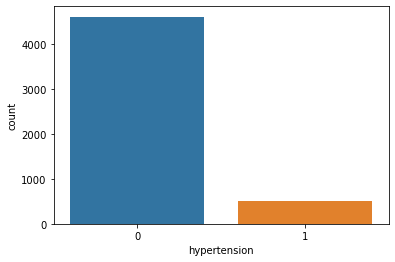

In [14]:
print(dataset.hypertension.value_counts())
# sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="hypertension")
plt.show()

*From above, it shows that less people are suffering from hypertension.*

### **Marriage Status** <a id="3.2.3"></a>

Yes    3353
No     1757
Name: ever_married, dtype: int64


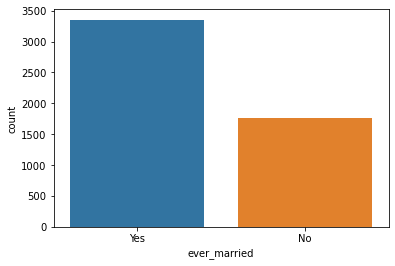

In [15]:
print(dataset.ever_married.value_counts())
# sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="ever_married")
plt.show()

*The ratio can seen from above is around 2:1 for being ever married.*

### **Work Type** <a id="3.2.4"></a>

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


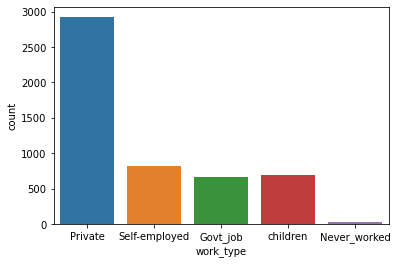

In [16]:
print(dataset.work_type.value_counts())
# sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="work_type")
plt.show()

*A lot of people works in Private sector.*

### **Residence Type** <a id="3.2.5"></a>

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


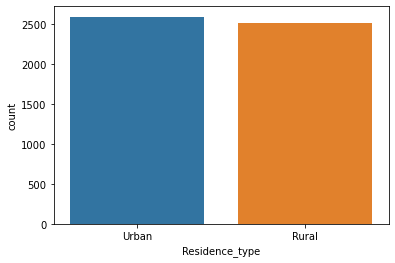

In [17]:
print(dataset.Residence_type.value_counts())
# sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="Residence_type")
plt.show()

*The residence type is same for people present in our dataset.*

### **Smoking Status** <a id="3.2.6"></a>

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


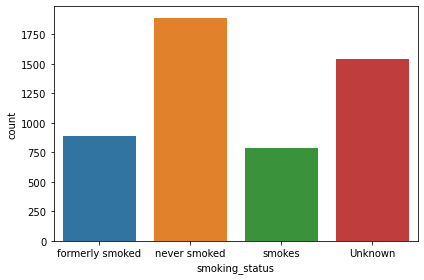

In [18]:
print(dataset.smoking_status.value_counts())
# sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

*A lot of people never smoked in their life. But, we also don't know the exact status of Unknowns in our dataset.*

### **Stroke** <a id="3.2.7"></a>

0    4861
1     249
Name: stroke, dtype: int64


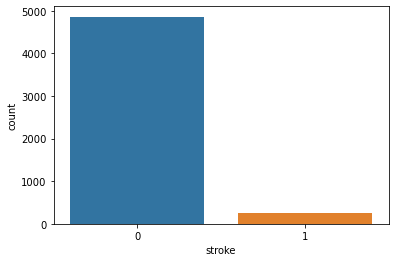

In [19]:
print(dataset.stroke.value_counts())
# sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="stroke")
plt.show()

*From above dependent variable, we have really less peoples who suffered stroke. But, this also means that our dataset is imbalance. We likely have to use sampling techniques to make the data balance.*

*But, first let's plot more to see how our data does in this state.*

## **Distribution Plot** <a id="3.3"></a>

### **Avg. Glucose Level** <a id="3.3.1"></a>

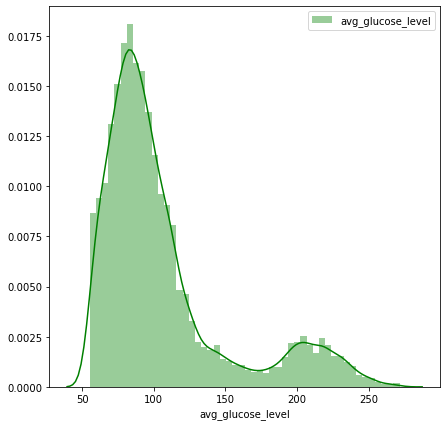

In [20]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

*1. The normal glucose levels in adults should be around 80-140. Therefore, the density is higher around that range. So, we can see that the we have lot of people who have normal glucose level, so they are not suffering from diabetes.*

*2. The range 140-200 can considered as pre-diabetes. But, looking at graph we can see that less people are in pre-diabetes zone.*

*3. Anything above 200 can be seen that the person is suffering from diabetes. The density is more as compare to pre-diabetes by looking at the graph.*

### **BMI** <a id="3.3.2"></a>

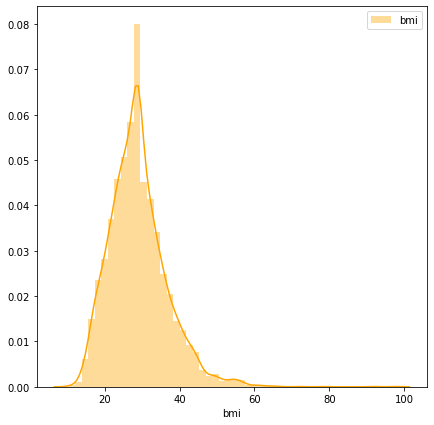

In [21]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.bmi, color="orange", label="bmi", kde= True)
plt.legend()

*1. BMI below 19 can be seen as under weight. By looking at our graph, not lot of people are underweight.*

*2. BMI between 19-25 can be seen as normal weight. We have relatively good amount of people who have normal weight.*

*3. BMI higher than 25 can be seen as the person is likely overweight or obese. Our graph shows the density is higher around those BMI.*

### **No Stroke vs Stroke by BMI** <a id="3.3.3"></a>

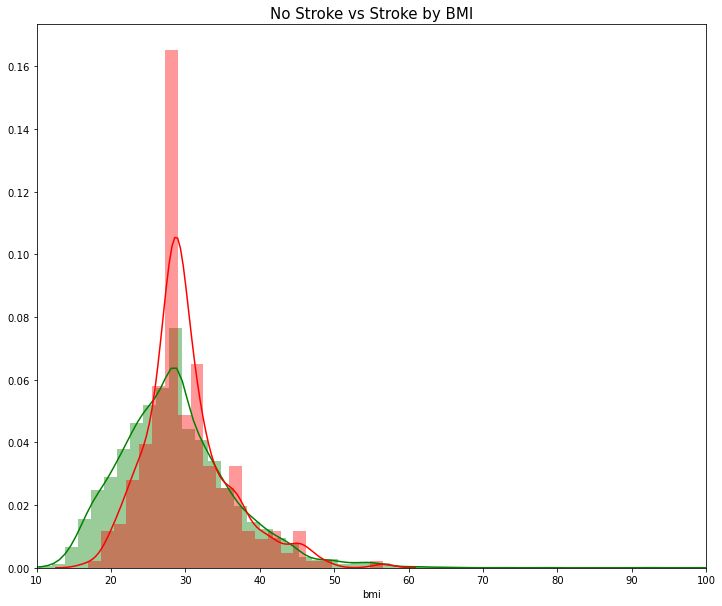

In [22]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

*From the graph, it shows that the density of overweight people who suffered a stroke is more.*

### **No Stroke vs Stroke by Avg. Glucose Level** <a id="3.3.4"></a>

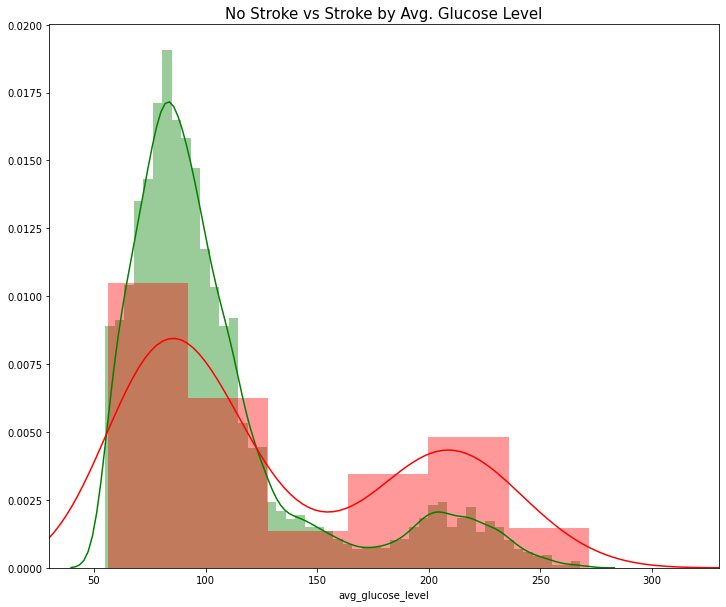

In [23]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

*From graph, it shows that the density of people having glucose level less than 100 suffered stroke more.*

### **No Stroke vs Stroke by Age** <a id="3.3.5"></a>

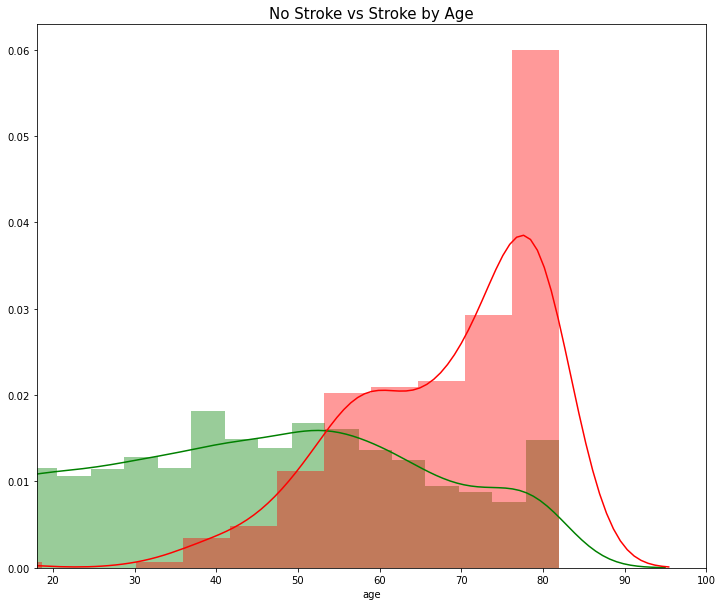

In [24]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

*From graph, it can be seen that the density of people having age above 50 suffered stroke more.*

## **Scatter Plot** <a id="3.4"></a>

### **Age vs BMI** <a id="3.4.1"></a>

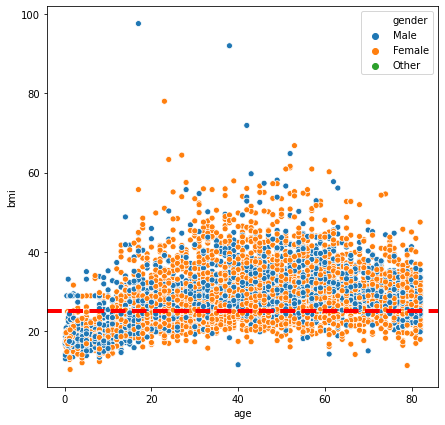

In [25]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

*From above plot, we can see that there are lot of people having BMI above 25 are overweight and obese.*

### **Age vs Avg. Glucose Level** <a id="3.4.2"></a>

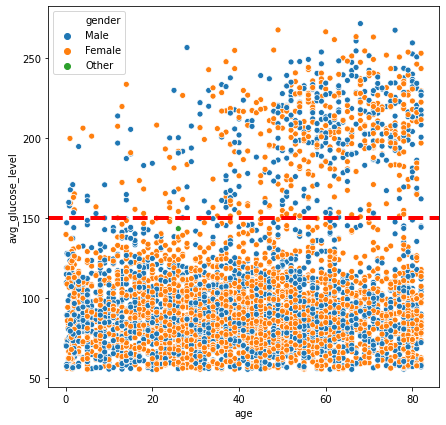

In [26]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

*From above plot, we can see that people having glucose level above 150 are relatively less as compare one below. So, we can say that people above 150 might be suffering from diabetes.*

## **Violin Plot** <a id="3.5"></a>

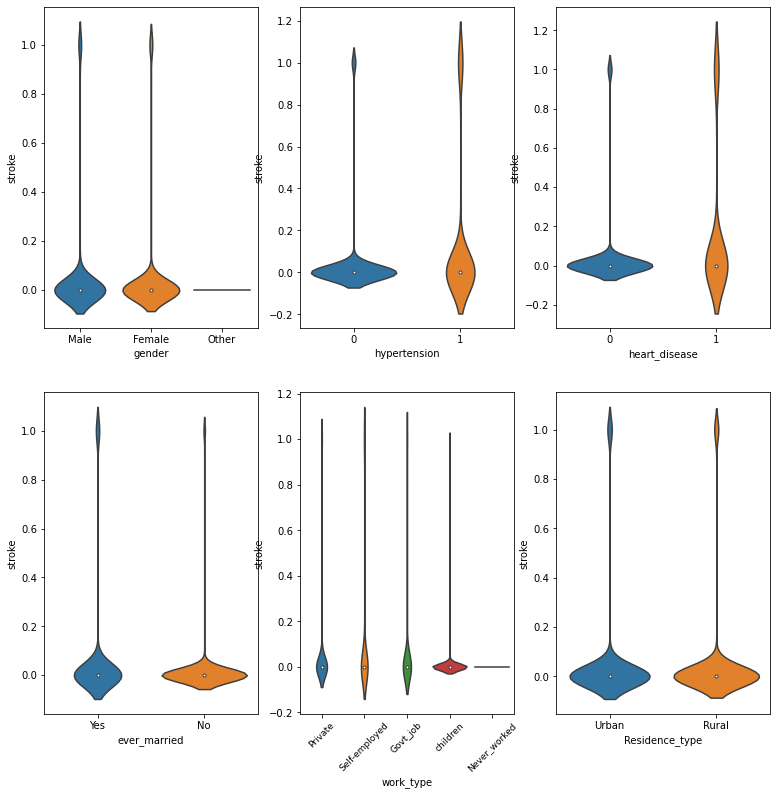

In [27]:
plt.figure(figsize=(13,13))
# sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'stroke', data = dataset)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'stroke', data = dataset)
plt.subplot(2,3,3)
sns.violinplot(x = 'heart_disease', y = 'stroke', data = dataset)
plt.subplot(2,3,4)
sns.violinplot(x = 'ever_married', y = 'stroke', data = dataset)
plt.subplot(2,3,5)
sns.violinplot(x = 'work_type', y = 'stroke', data = dataset)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'Residence_type', y = 'stroke', data = dataset)
plt.show()

## **Pair Plot** <a id="3.6"></a>

<Figure size 720x720 with 0 Axes>

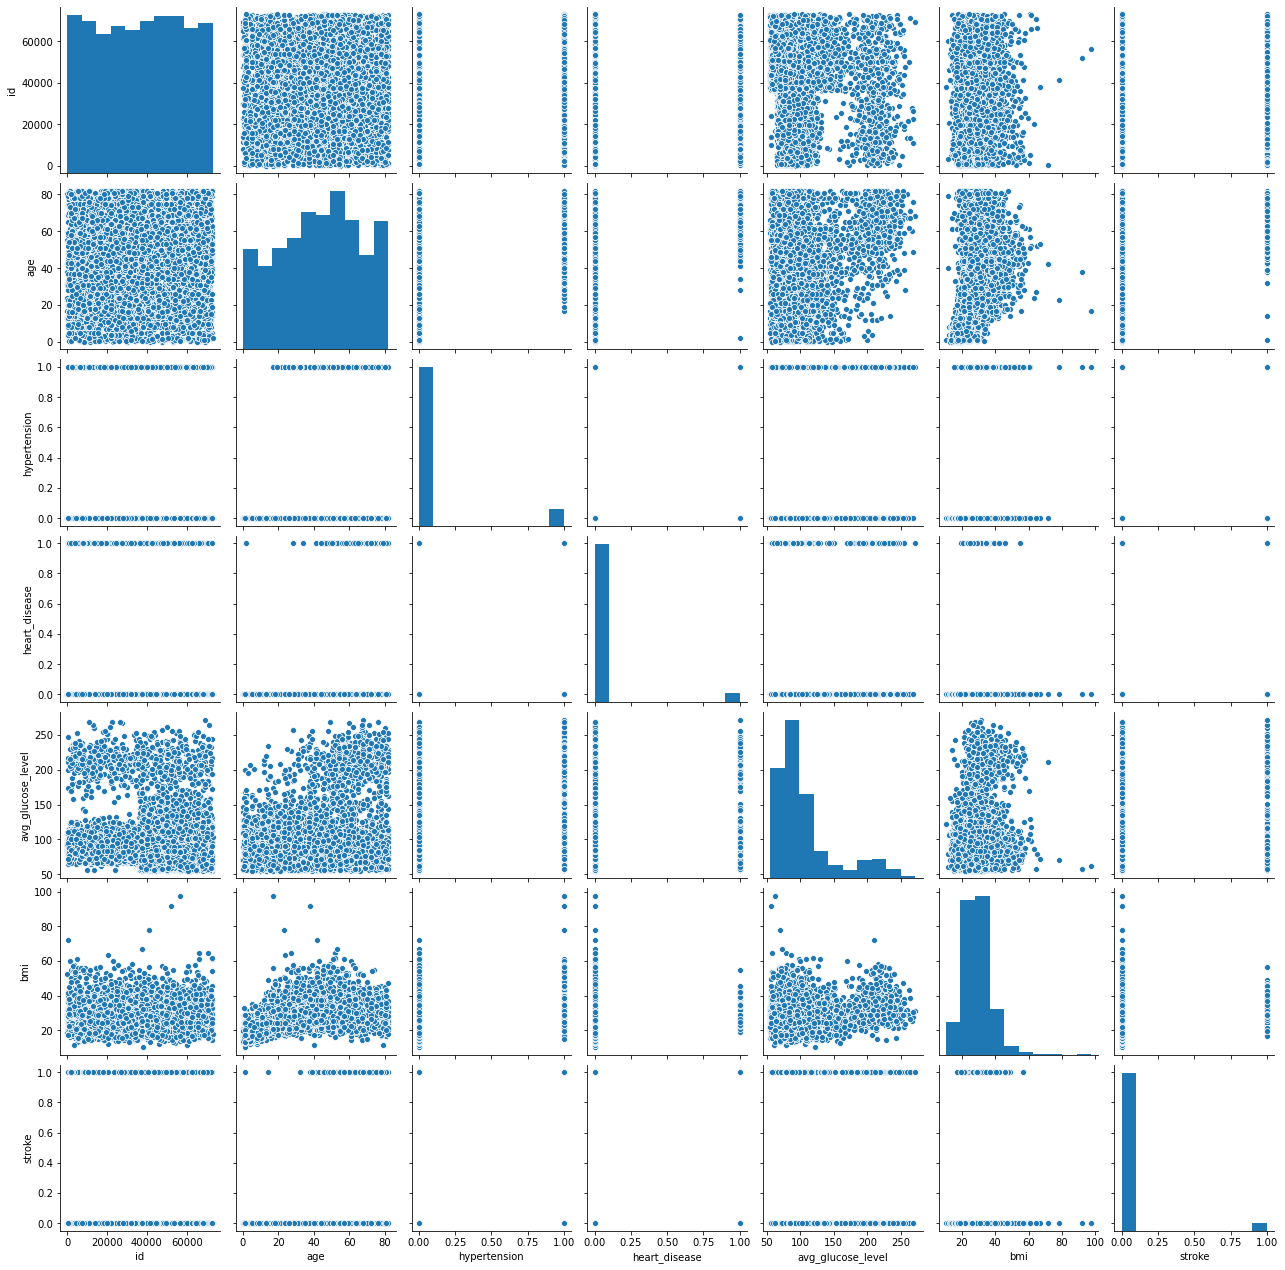

In [28]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(dataset)
plt.show()

# **Data Preprocessing** <a id="4"></a>

In [29]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [30]:
x[0]

array(['Male', 67.0, 0, 1, 'Yes', 'Private', 'Urban', 228.69, 36.6,
       'formerly smoked'], dtype=object)

In [31]:
x.shape

(5110, 10)

In [32]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Encoding <a id="5"></a>

## **Categorical Encoding** <a id="5.1"></a>

We are using **OneHotEncoder()** to encode the categorical columns: '**gender**', '**work_type**' and '**smoking_status**.

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0,5,9])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))

In [34]:
x

array([[0.0, 1.0, 0.0, ..., 'Urban', 228.69, 36.6],
       [1.0, 0.0, 0.0, ..., 'Rural', 202.21, 28.893236911794673],
       [0.0, 1.0, 0.0, ..., 'Rural', 105.92, 32.5],
       ...,
       [1.0, 0.0, 0.0, ..., 'Rural', 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 'Rural', 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 'Urban', 85.28, 26.2]], dtype=object)

In [35]:
x.shape

(5110, 19)

In [36]:
print(x[2])

[0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 80.0 0 1 'Yes' 'Rural'
 105.92 32.5]


## Label Encoding <a id="5.2"></a>

We are using **LabelEncoder()** to encode binary columns: '**ever_married**' and '**residence_type**'

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 15] = le.fit_transform(x[:, 15])
x[:, 16] = le.fit_transform(x[:, 16])

In [38]:
x

array([[0.0, 1.0, 0.0, ..., 1, 228.69, 36.6],
       [1.0, 0.0, 0.0, ..., 0, 202.21, 28.893236911794673],
       [0.0, 1.0, 0.0, ..., 0, 105.92, 32.5],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 0, 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 1, 85.28, 26.2]], dtype=object)

In [39]:
print('Shape of X: ', x.shape)
print('Shape of Y: ', y.shape)

Shape of X:  (5110, 19)
Shape of Y:  (5110,)


# Splitting the dataset into the Training set and Test set <a id="6"></a>

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [41]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (4088, 19)
Number transactions y_train dataset:  (4088,)
Number transactions x_test dataset:  (1022, 19)
Number transactions y_test dataset:  (1022,)


In [42]:
print(x_train[0])

[1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 36.0 0 0 1 0 67.29 36.7]


# Feature Scaling <a id="7"></a>

In [43]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
print(x_test)

[[-1.19540614e+00  1.19601001e+00 -1.56421945e-02 ...  9.80138492e-01
   8.53154763e-01 -3.19762237e-01]
 [-1.19540614e+00  1.19601001e+00 -1.56421945e-02 ... -1.02026398e+00
  -7.78468796e-04 -1.55806272e+00]
 [-1.19540614e+00  1.19601001e+00 -1.56421945e-02 ...  9.80138492e-01
  -5.80737776e-01 -3.83592159e-01]
 ...
 [-1.19540614e+00  1.19601001e+00 -1.56421945e-02 ... -1.02026398e+00
  -8.14311033e-01  9.31304234e-01]
 [-1.19540614e+00  1.19601001e+00 -1.56421945e-02 ...  9.80138492e-01
   2.90299190e+00 -1.47600169e-03]
 [ 8.36535773e-01 -8.36113401e-01 -1.56421945e-02 ... -1.02026398e+00
  -5.07442576e-01 -1.16231721e+00]]


# Handling Imbalance data using SMOTE <a id="8"></a>

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3893 

After OverSampling, the shape of train_X: (7786, 19)
After OverSampling, the shape of train_y: (7786,) 

After OverSampling, counts of label '1': 3893
After OverSampling, counts of label '0': 3893


In [47]:
import pickle
import os

In [48]:
scaler_path=os.path.join('C:/Users/asus/Desktop/VI SEM/Minor project/stroke prediction/','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(sc,scaler_file)

# Model Selection <a id="9"></a>

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [51]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[750 218]
 [ 15  39]]
Accuracy Score:  0.7720156555772995

K-Fold Validation Mean Accuracy: 79.45 %

Standard Deviation: 1.39 %

ROC AUC Score: 0.75

Precision: 0.15

Recall: 0.72

F1: 0.25
-----------------------------------

SVM :
[[794 174]
 [ 32  22]]
Accuracy Score:  0.7984344422700587

K-Fold Validation Mean Accuracy: 88.36 %

Standard Deviation: 1.54 %

ROC AUC Score: 0.61

Precision: 0.11

Recall: 0.41

F1: 0.18
-----------------------------------

KNeighbors :
[[837 131]
 [ 36  18]]
Accuracy Score:  0.8365949119373777

K-Fold Validation Mean Accuracy: 90.77 %

Standard Deviation: 0.87 %

ROC AUC Score: 0.60

Precision: 0.12

Recall: 0.33

F1: 0.18
-----------------------------------

GaussianNB :
[[145 823]
 [  2  52]]
Accuracy Score:  0.19275929549902152

K-Fold Validation Mean Accuracy: 57.33 %

Standard Deviation: 0.86 %

ROC AUC Score: 0.56

Precision: 0.06

Recall: 0.96

F1: 0.11
-----------------------------------

BernoulliNB :
[[574 394]
 [  9  4

In [52]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [53]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [54]:
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
7,XGBoost,92.465753,95.582779,6.036886,0.531833,0.151515,0.092593,0.114943
6,Random Forest,90.606654,95.967343,1.377559,0.522019,0.096154,0.092593,0.094340
5,Decision Tree,86.007828,90.393013,2.936513,0.515228,0.067961,0.129630,0.089172
2,KNeighbors,83.659491,90.765631,0.866181,0.599001,0.120805,0.333333,0.177340
1,SVM,79.843444,88.363831,1.536875,0.613828,0.112245,0.407407,0.176000
0,Logistic Regreesion,77.201566,79.450089,1.386548,0.748508,0.151751,0.722222,0.250804
4,BernoulliNB,60.567515,72.938676,1.593421,0.713154,0.102506,0.833333,0.182556
3,GaussianNB,19.275930,57.333590,0.861249,0.556378,0.059429,0.962963,0.111948


# Tuning the models

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
##in GridSearchCV first parameter is model and second is parameter grid in which we try different parameter values, gridsearch cv still uses k-fold cross validation i.e cv parameter is required

In [57]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [58]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 79.45%
Best Parameters :  {'C': 0.75, 'random_state': 0}

----------------

KNeighborsClassifier():
Best Accuracy : 91.92%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5}

----------------

SVC():
Best Accuracy : 88.36%
Best Parameters :  {'C': 1, 'kernel': 'rbf', 'random_state': 0}

----------------

GaussianNB():
Best Accuracy : 57.33%
Best Parameters :  {'var_smoothing': 1e-09}

----------------

BernoulliNB():
Best Accuracy : 72.94%
Best Parameters :  {'alpha': 0.25}

----------------

DecisionTreeClassifier():
Best Accuracy : 91.10%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 95.97%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 100, 'random_state': 0}

----------------

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, import

# Models after tuning hyperparameters

## RandomForest

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       968
           1       0.10      0.09      0.09        54

    accuracy                           0.91      1022
   macro avg       0.52      0.52      0.52      1022
weighted avg       0.90      0.91      0.91      1022

ROC AUC score: 0.7328397612488522
Accuracy Score:  0.9060665362035225


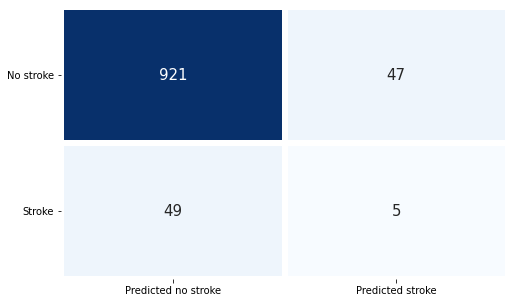

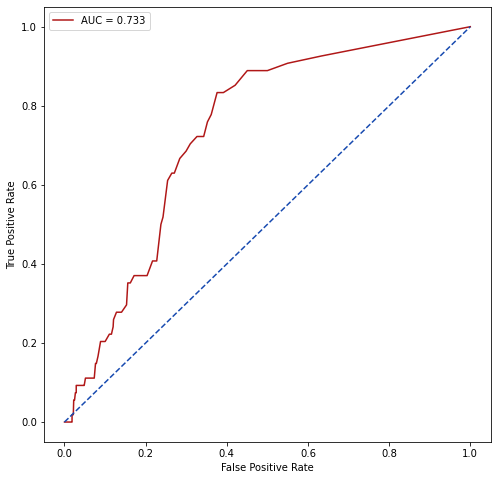

In [59]:
#Fitting RandomForest Model with parameters obtained from gridsearchcv
rf_classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
rf_classifier.fit(x_train_res, y_train_res)
y_pred = rf_classifier.predict(x_test)
y_prob = rf_classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## XGBoost classifier

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       968
           1       0.11      0.17      0.13        54

    accuracy                           0.89      1022
   macro avg       0.53      0.55      0.54      1022
weighted avg       0.91      0.89      0.90      1022

ROC AUC score: 0.7473599632690542
Accuracy Score:  0.8864970645792564


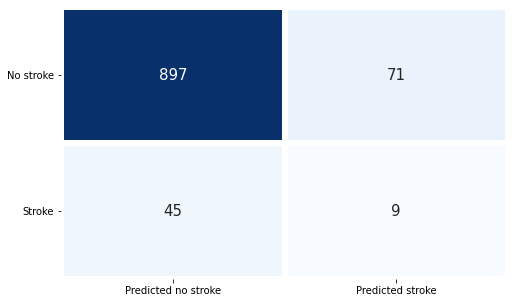

Text(0.5, 0, 'False Positive Rate')

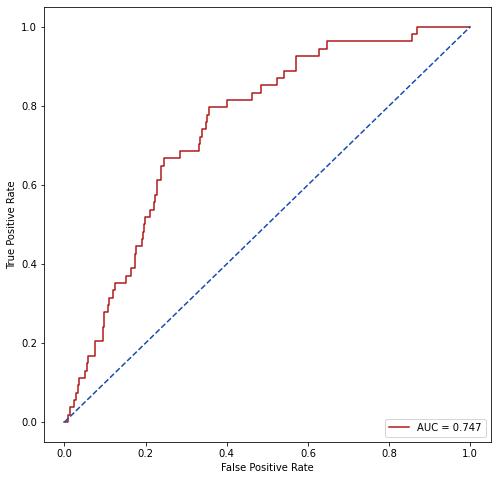

In [60]:
#Fitting XGBClassifier Model
xgb_classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xgb_classifier.fit(x_train_res, y_train_res)
y_pred = xgb_classifier.predict(x_test)
y_prob = xgb_classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Therefore, after the multiple visualizations of our and going through all the performance of the models. We've tuned the hyperparameters with the help of GridSearch to get models. After that, we came to conclusion that RandomForestClassifier is best model for this dataset.

In [61]:
import joblib
model_path=os.path.join('C:/Users/asus/Desktop/VI SEM/Minor project/stroke prediction/','models/rf.sav')
joblib.dump(rf_classifier,model_path)

['C:/Users/asus/Desktop/VI SEM/Minor project/stroke prediction/models/rf.sav']